# Explore here

In [3]:
import pandas as pd

# Cargar el dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
print(df.head())

                                                 url  is_spam
0  https://briefingday.us8.list-manage.com/unsubs...     True
1                             https://www.hvper.com/     True
2                 https://briefingday.com/m/v4n3i4f3     True
3   https://briefingday.com/n/20200618/m#commentform    False
4                        https://briefingday.com/fan     True


In [5]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...


True

PASO 2:

In [8]:

# Descargar recursos de nltk 
nltk.download('stopwords')
nltk.download('wordnet')

# Preparar stopwords y lematizador
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Función de preprocesamiento de URL
def preprocess_url(url):
    # Reemplazar signos de puntuación por espacios
    url_clean = re.sub(r'[/:.?=&\-#]', ' ', url)
    
    # Tokenizar y pasar a minúsculas
    tokens = url_clean.lower().split()
    
    # Eliminar stopwords
    tokens = [t for t in tokens if t not in stop_words]
    
    # Lematizar tokens
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    # Devolver tokens como texto unido
    return ' '.join(tokens)

# Convertir columna is_spam a números
df['is_spam'] = df['is_spam'].astype(int)

# Aplicar preprocesamiento a todas las URLs
df['processed_url'] = df['url'].apply(preprocess_url)

# Revisar resultado
df[['url', 'processed_url', 'is_spam']].head()

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,url,processed_url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,http briefingday us8 list manage com unsubscribe,1
1,https://www.hvper.com/,http www hvper com,1
2,https://briefingday.com/m/v4n3i4f3,http briefingday com v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,http briefingday com n 20200618 commentform,0
4,https://briefingday.com/fan,http briefingday com fan,1


In [9]:
from sklearn.model_selection import train_test_split

# Variables de entrada (URLs preprocesadas) y salida (spam/no spam)
X = df['processed_url']
y = df['is_spam']

# Dividir en train y test
# stratify=y asegura que la proporción de spam/no spam sea igual en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,   # 30% test, 70% train
    random_state=42, # para reproducibilidad
    stratify=y       # mantiene proporción de clases
)

# Verificar tamaños y proporciones
print("Tamaño train:", X_train.shape[0])
print("Tamaño test:", X_test.shape[0])
print("Proporción spam en train:", y_train.mean())
print("Proporción spam en test:", y_test.mean())


Tamaño train: 2099
Tamaño test: 900
Proporción spam en train: 0.23201524535493093
Proporción spam en test: 0.23222222222222222


PASO 3:

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar solo con los datos de entrenamiento y transformar train y test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Dimensiones train:", X_train_tfidf.shape)
print("Dimensiones test:", X_test_tfidf.shape)


Dimensiones train: (2099, 5091)
Dimensiones test: (900, 5091)


In [11]:
#ENTRENAR
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear modelo SVM con parámetros por defecto
svm_model = SVC()

# Entrenar
svm_model.fit(X_train_tfidf, y_train)

# Predecir
y_pred = svm_model.predict(X_test_tfidf)


Accuracy: 0.9377777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       691
           1       0.87      0.86      0.87       209

    accuracy                           0.94       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.94      0.94      0.94       900



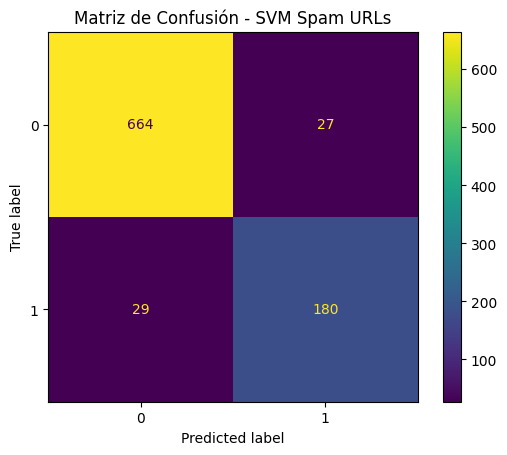

In [12]:
#ANALIZAR
# Accuracy general
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_tfidf, y_test)
plt.title("Matriz de Confusión - SVM Spam URLs")
plt.show()


PASO 4:

In [13]:
from sklearn.model_selection import GridSearchCV

# Definir parámetros a explorar
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Crear SVM
svm = SVC()

# Grid search con validación cruzada 5-fold
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Entrenar en los datos de entrenamiento vectorizados
grid_search.fit(X_train_tfidf, y_train)

# Mejor modelo
best_svm = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.3s
[CV] END ...................C=0.1, gamma=auto, k

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       691
           1       0.83      0.90      0.86       209

    accuracy                           0.93       900
   macro avg       0.90      0.92      0.91       900
weighted avg       0.94      0.93      0.93       900



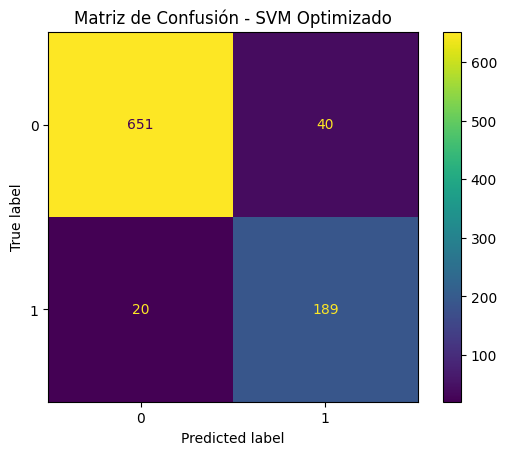

In [14]:
# Predecir en test
y_pred_best = best_svm.predict(X_test_tfidf)

# Métricas
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_svm, X_test_tfidf, y_test)
plt.title("Matriz de Confusión - SVM Optimizado")
plt.show()


paso 5:

In [15]:
import joblib

# Guardar el modelo
joblib.dump(best_svm, "svm_url_spam_model.pkl")

# Guardar el vectorizador
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Modelo y vectorizador guardados correctamente.")


Modelo y vectorizador guardados correctamente.
